## Install libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import time
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot') 
from matplotlib.pyplot import figure
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Training
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Exporting
import pickle

## Load dataset

In [2]:
# Read the CSV file's data
df = pd.read_csv('heart.csv')

## EDA

In [3]:
# Quick look at the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Show the dataset's shape
df.shape

(303, 14)

In [5]:
# Show the non null count and datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


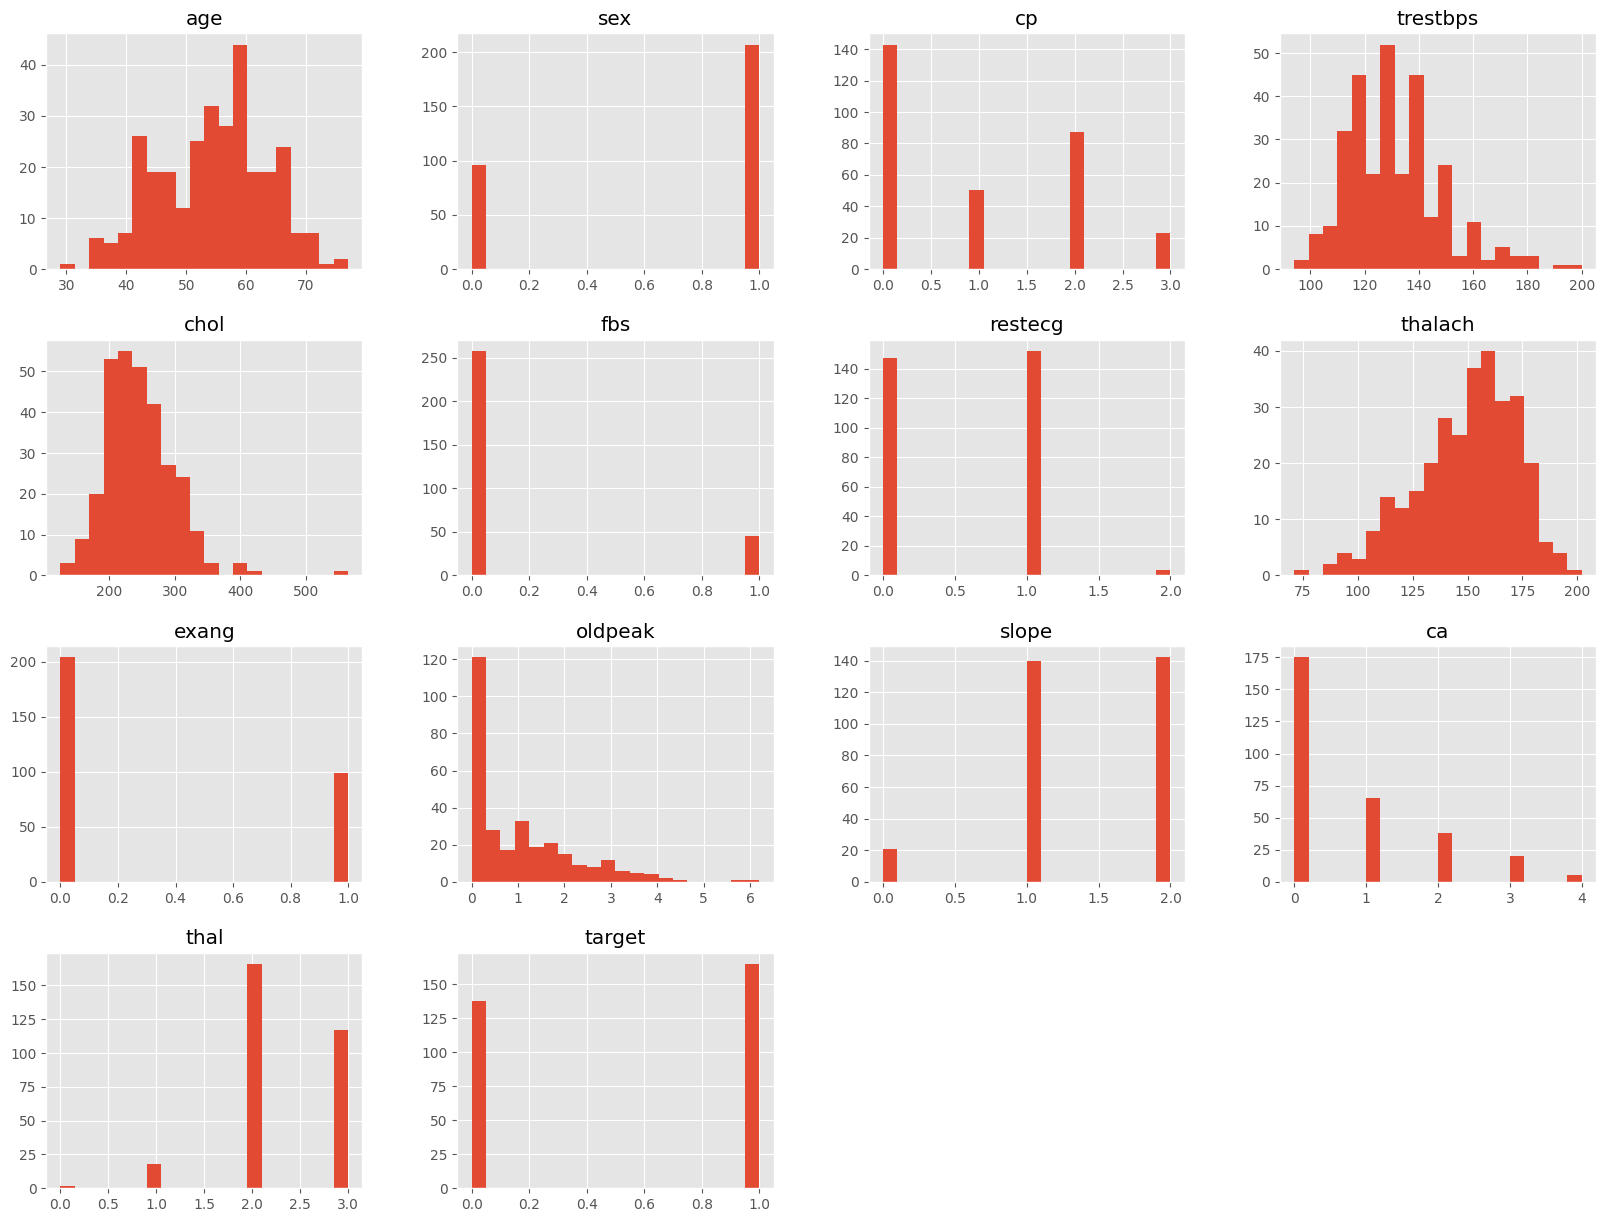

In [7]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [8]:
# Look better at the target variable
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

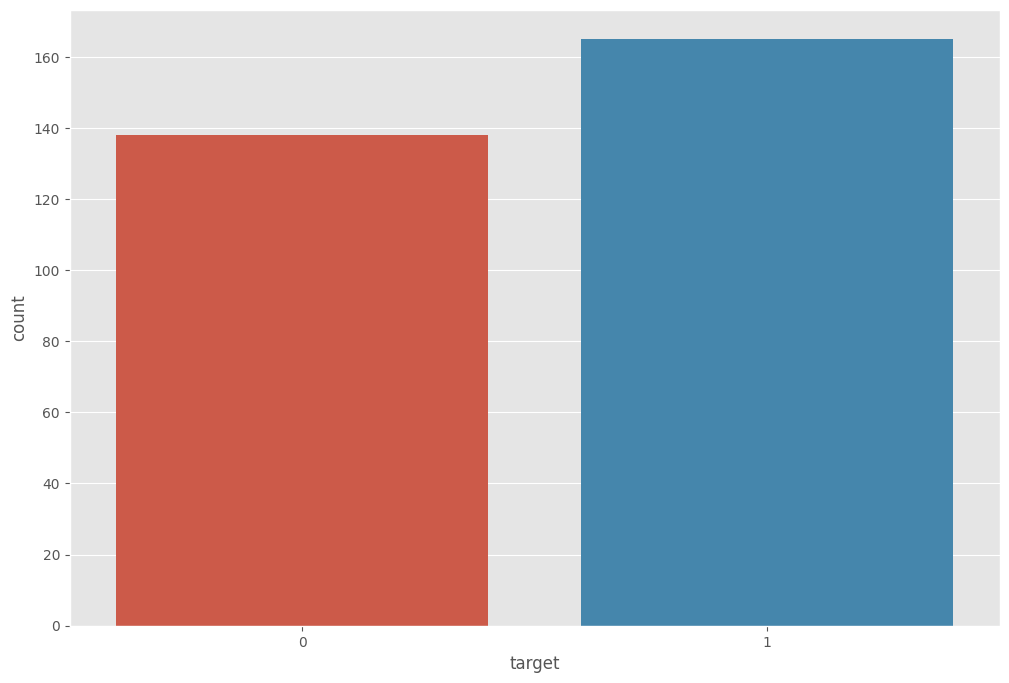

In [9]:
# Visualise the target variable
sns.countplot(x='target', data=df)

In [10]:
# Calculate the number of samples in each class
num_class_0 = np.sum(df.values == 0)
num_class_1 = np.sum(df.values == 1)


# Calculate the class imbalance ratio
class_imbalance_ratio = num_class_0 / (num_class_0 + num_class_1)
print(f"Class imbalance ratio: {class_imbalance_ratio}")

Class imbalance ratio: 0.5732797140303842


In [11]:
# Check for duplicate values
df.duplicated().sum()

1

In [12]:
# Each duplicate
duplicate_rows = df[df.duplicated(keep=False)]

# Print the duplicate rows
print(duplicate_rows)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1  


<AxesSubplot: >

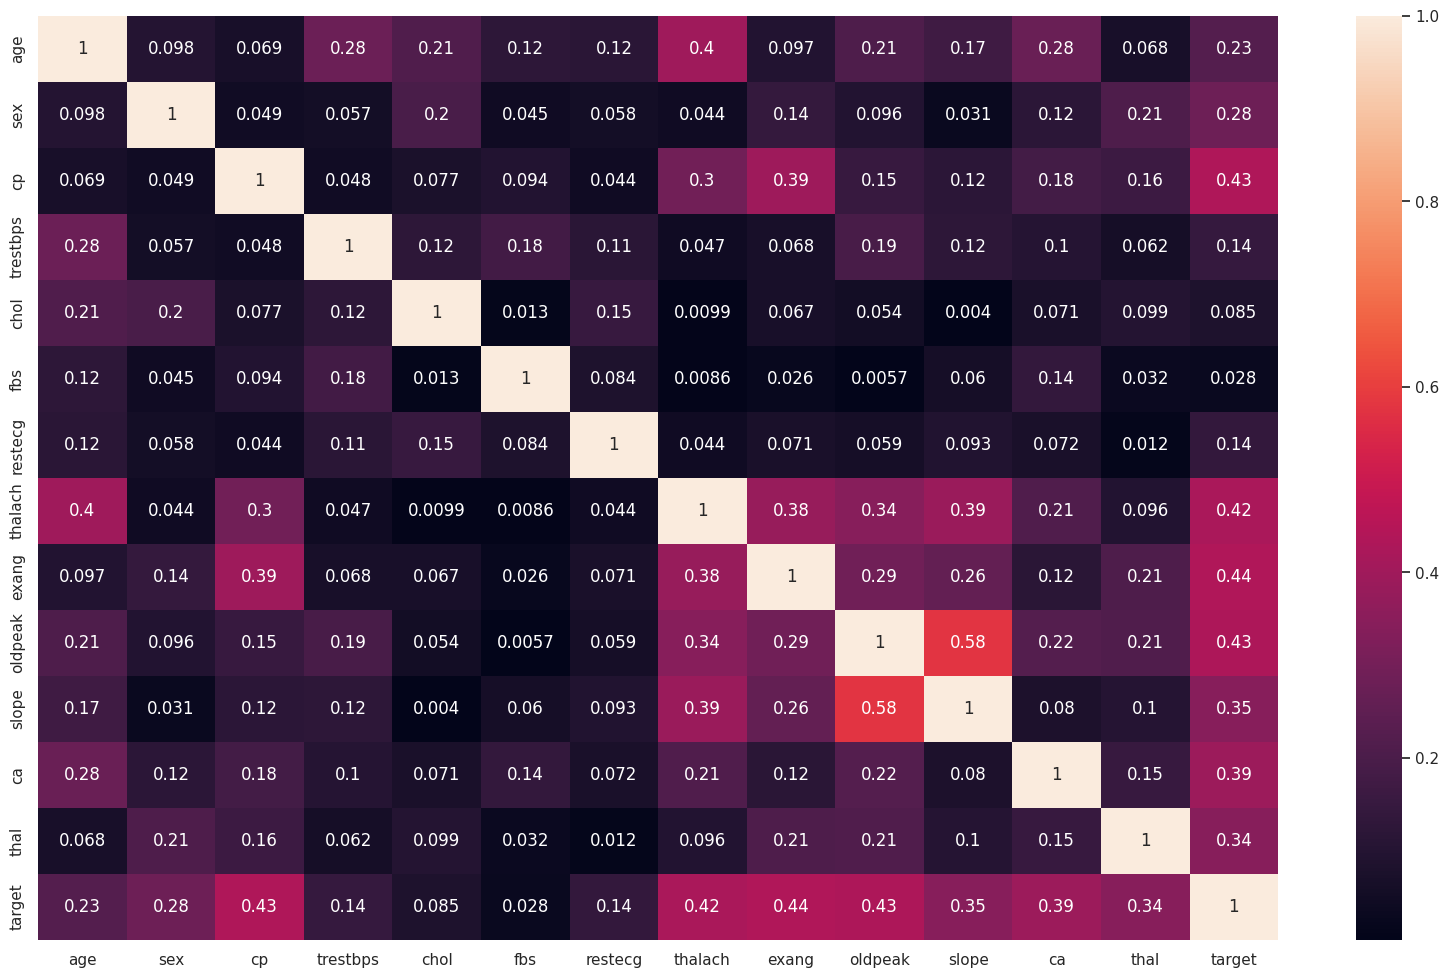

In [13]:
# Correlation heatmap
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(df.corr().abs(),annot=True)

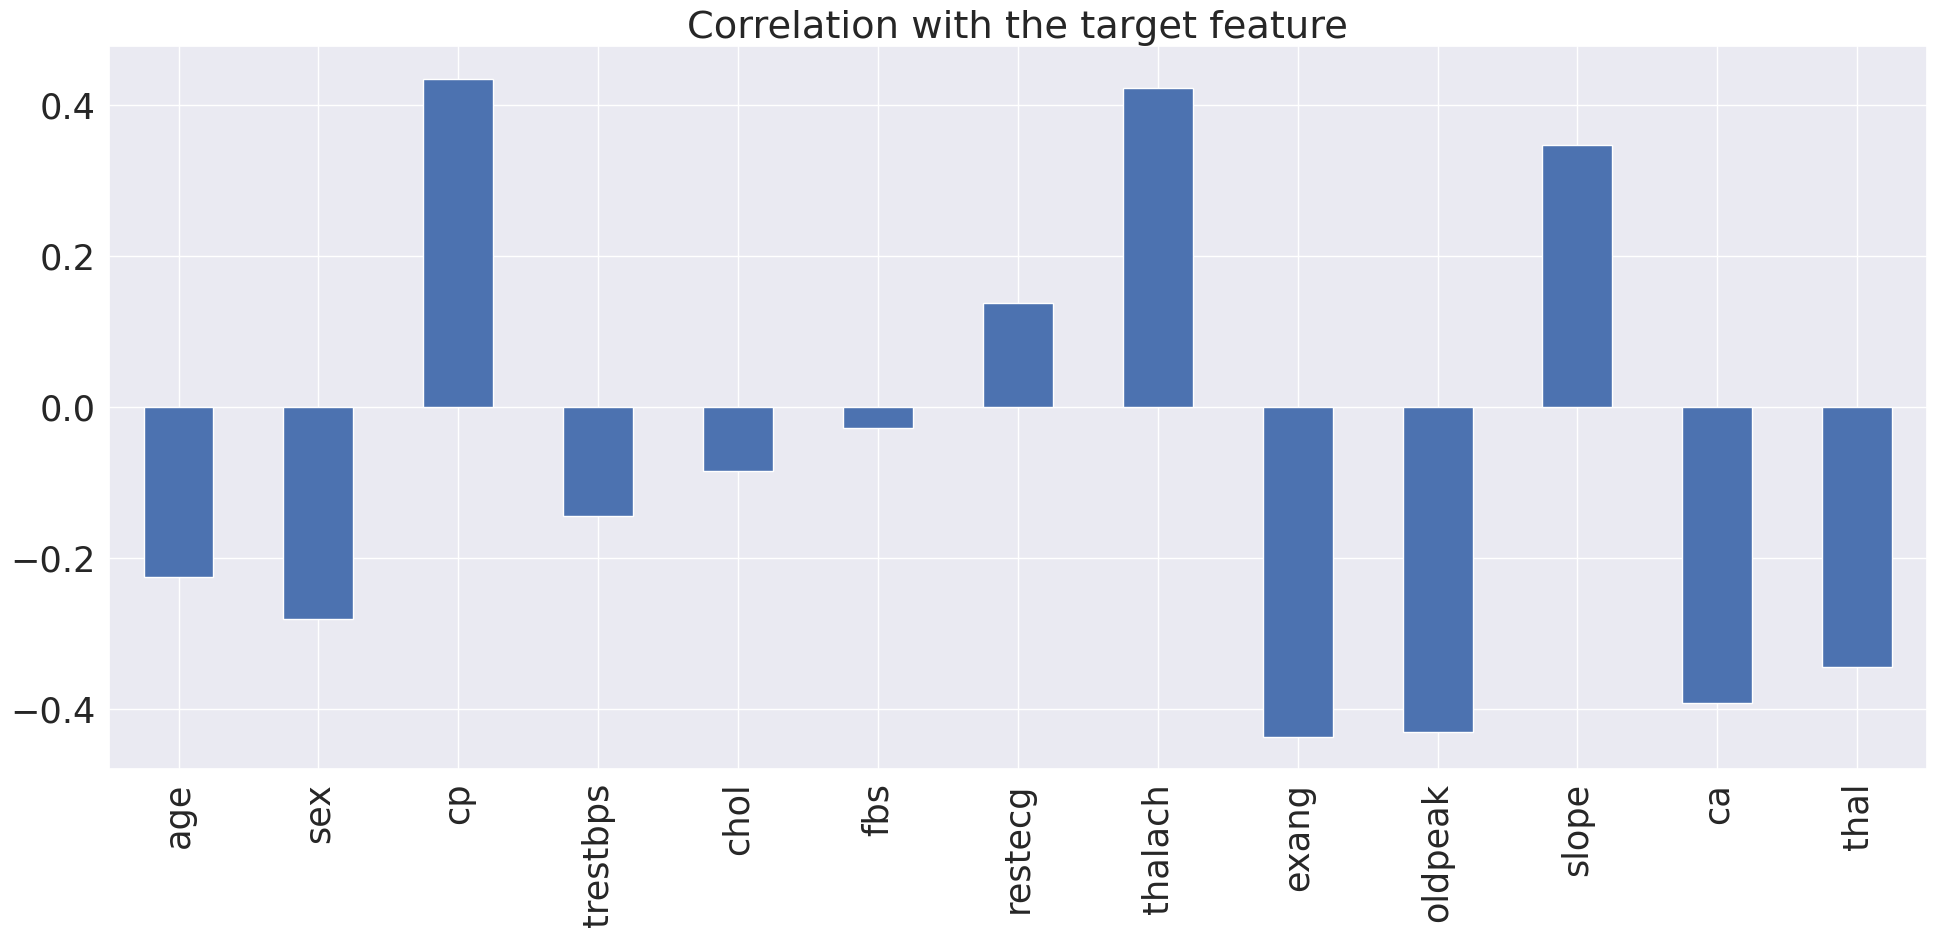

In [14]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

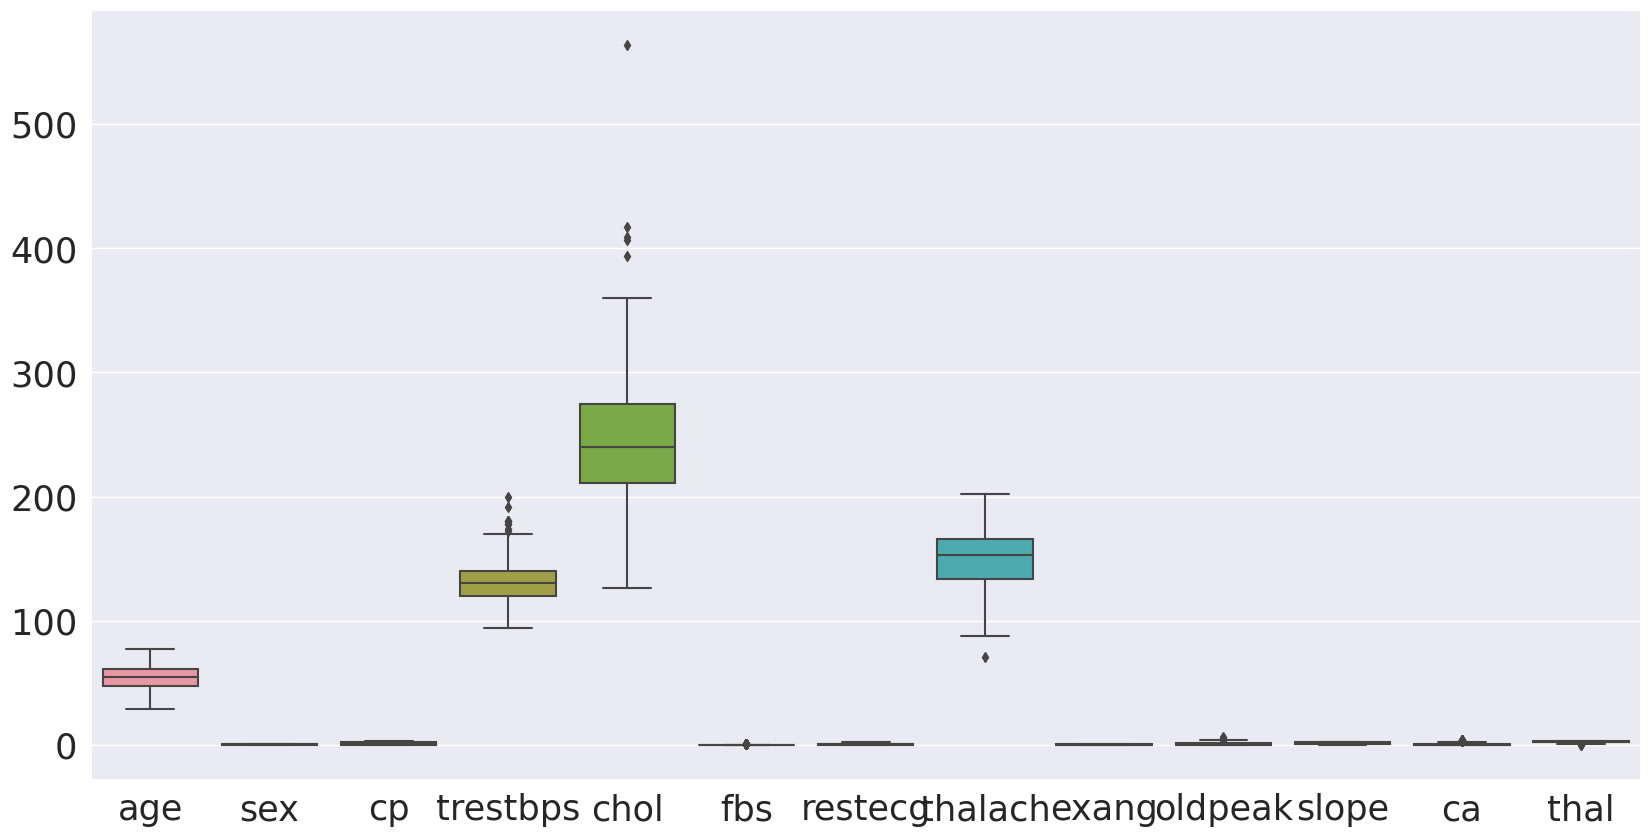

In [16]:
# Visualise the outliers of the numerical columns
plt.figure(figsize=(20, 10), facecolor='w')

sns.boxplot(data=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])

plt.show()

In [17]:
# find the extreme value of chol column
df['chol'].max()

564

In [18]:
# find the extreme value of trestbps column
print("max: ", df['trestbps'].max())

print("min: ", df['trestbps'].min())

max:  200
min:  94


## Data Cleaning and Preprocessing

### Verify that there is no null value

In [19]:
# Prin number of missing values in each column
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Fixing the outliers

In [20]:
# Show the columns which need outlier treatment
# Exclude the target var
dfIQR=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]


dfIQR.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [21]:
Q1 = dfIQR.quantile(0.25) # Calculate 1st quantile
Q3 = dfIQR.quantile(0.75) # Calculate 3rd quantile


IQR = Q3-Q1 

In [22]:
# Check for values that fall below the lower bound and above the upper bound 
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/tmp/ipykernel_24644/1221052556.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


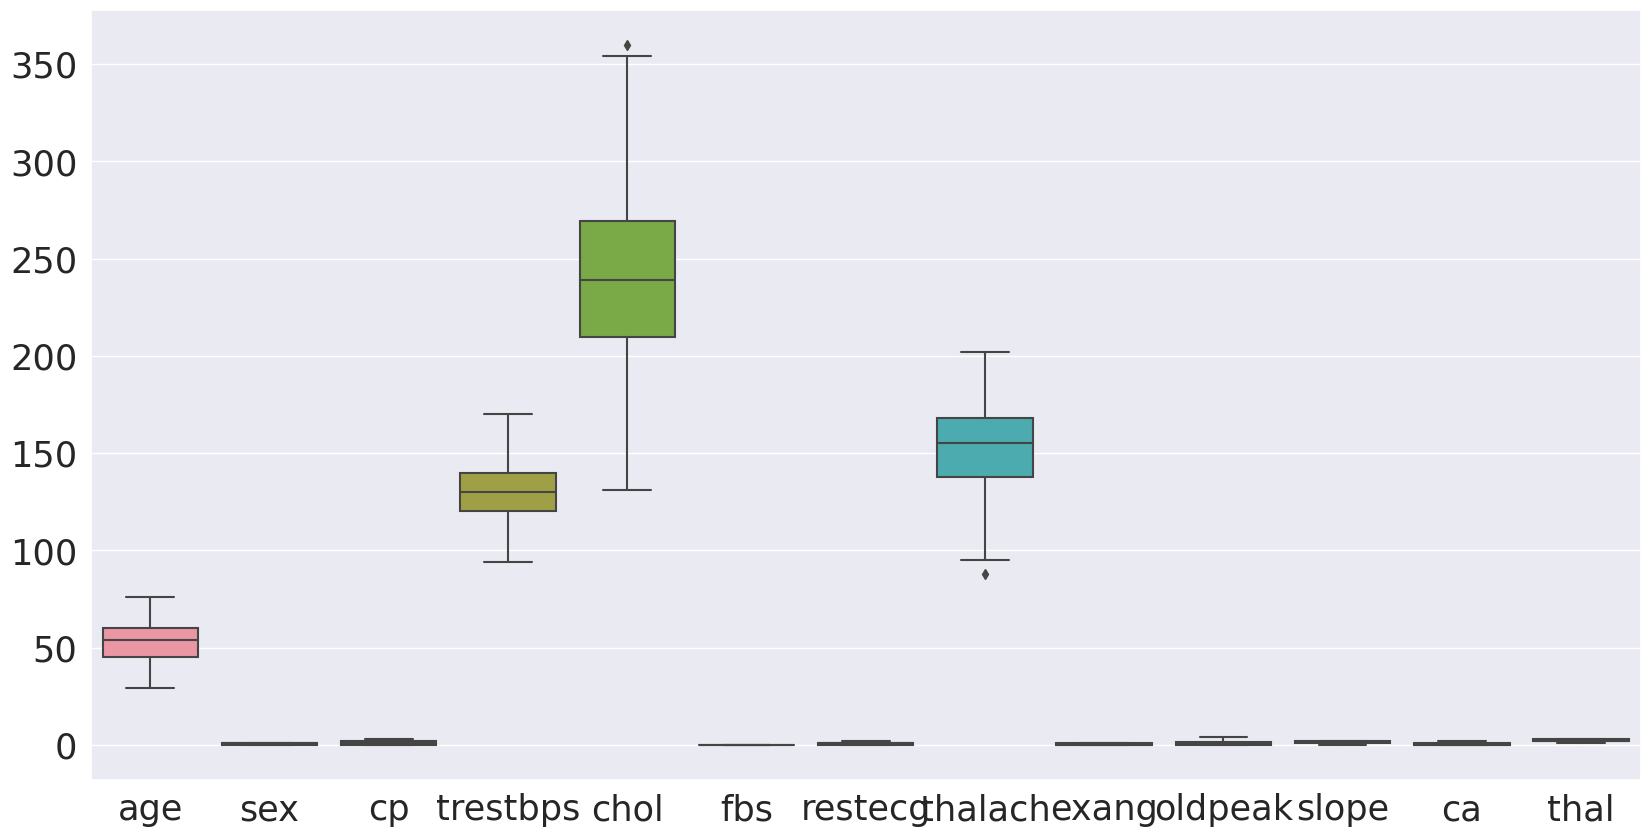

In [23]:
# Visualise the outliers of the numerical columns again
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
plt.show()

In [24]:
# Check for duplicate values
df.duplicated().sum()

0

### Feature Selection

In [25]:
# Separate independent and dependent variables
X = df.iloc[:, :-1]  # independent columns
y = df.iloc[:, -1]    # target column


# We have 13 features
bestfeatures = SelectKBest(score_func=chi2, k=10) # Apply SelectKBest class to extract top 10 best features
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns


print(featureScores.nlargest(9, 'Score'))  # Print 10 most important features

      Specs       Score
7   thalach  132.746263
9   oldpeak   49.620172
11       ca   46.381255
2        cp   34.506554
8     exang   26.790404
0       age   16.776474
1       sex    9.776860
4      chol    8.341441
12     thal    6.392584


In [26]:
# Drop the least important features
drop_columns = ['restecg', 'trestbps', 'slope']
df = df.drop(drop_columns, axis=1) # axis=1 as we want to drop columns, not rows

## Split the dataset to 80%-20%

In [27]:
# Split the dataset
x = df.iloc[:, :-1] # Independent variables
y = df.iloc[:, -1] # Dependent variable


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

### Check balance class

In [28]:
# View the percentage of each class

print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True)*100


Balance of positive and negative classes (%):


1    60.43956
0    39.56044
Name: target, dtype: float64

## Implementation and Evaluation of the algorithms

In [29]:
def fit_and_evaluate_the_model(model, x_train, y_train, x_test, y_test):
    # Fit the training set to the model
    model.fit(x_train, y_train)
    
    # The model predicts the labels of the features in the test set
    y_pred = model.predict(x_test)
    
    
    print(classification_report(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, fmt = "g")
    
    
    # Plot the confusion matrix
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    
    
    # Display the visualisation of the Confusion Matrix
    plt.rcParams["figure.figsize"] = (5, 3)
    plt.show()

In [30]:
def find_best_parameters(model, param_grid, x_train, y_train, x_test, y_test):
    
    # Create a grid search object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="recall")

    # Fit the grid search object to the training data
    grid_search.fit(x_train, y_train)

    # Print the best parameters
    print("Best Parameters:", grid_search.best_params_)
    
    # Get the result in a tabular format
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Recall"])],axis=1)
    
    
    return result.sort_values(by="Recall", ascending=False)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.90      0.86      0.88        22

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46

Recall:  0.8636363636363636


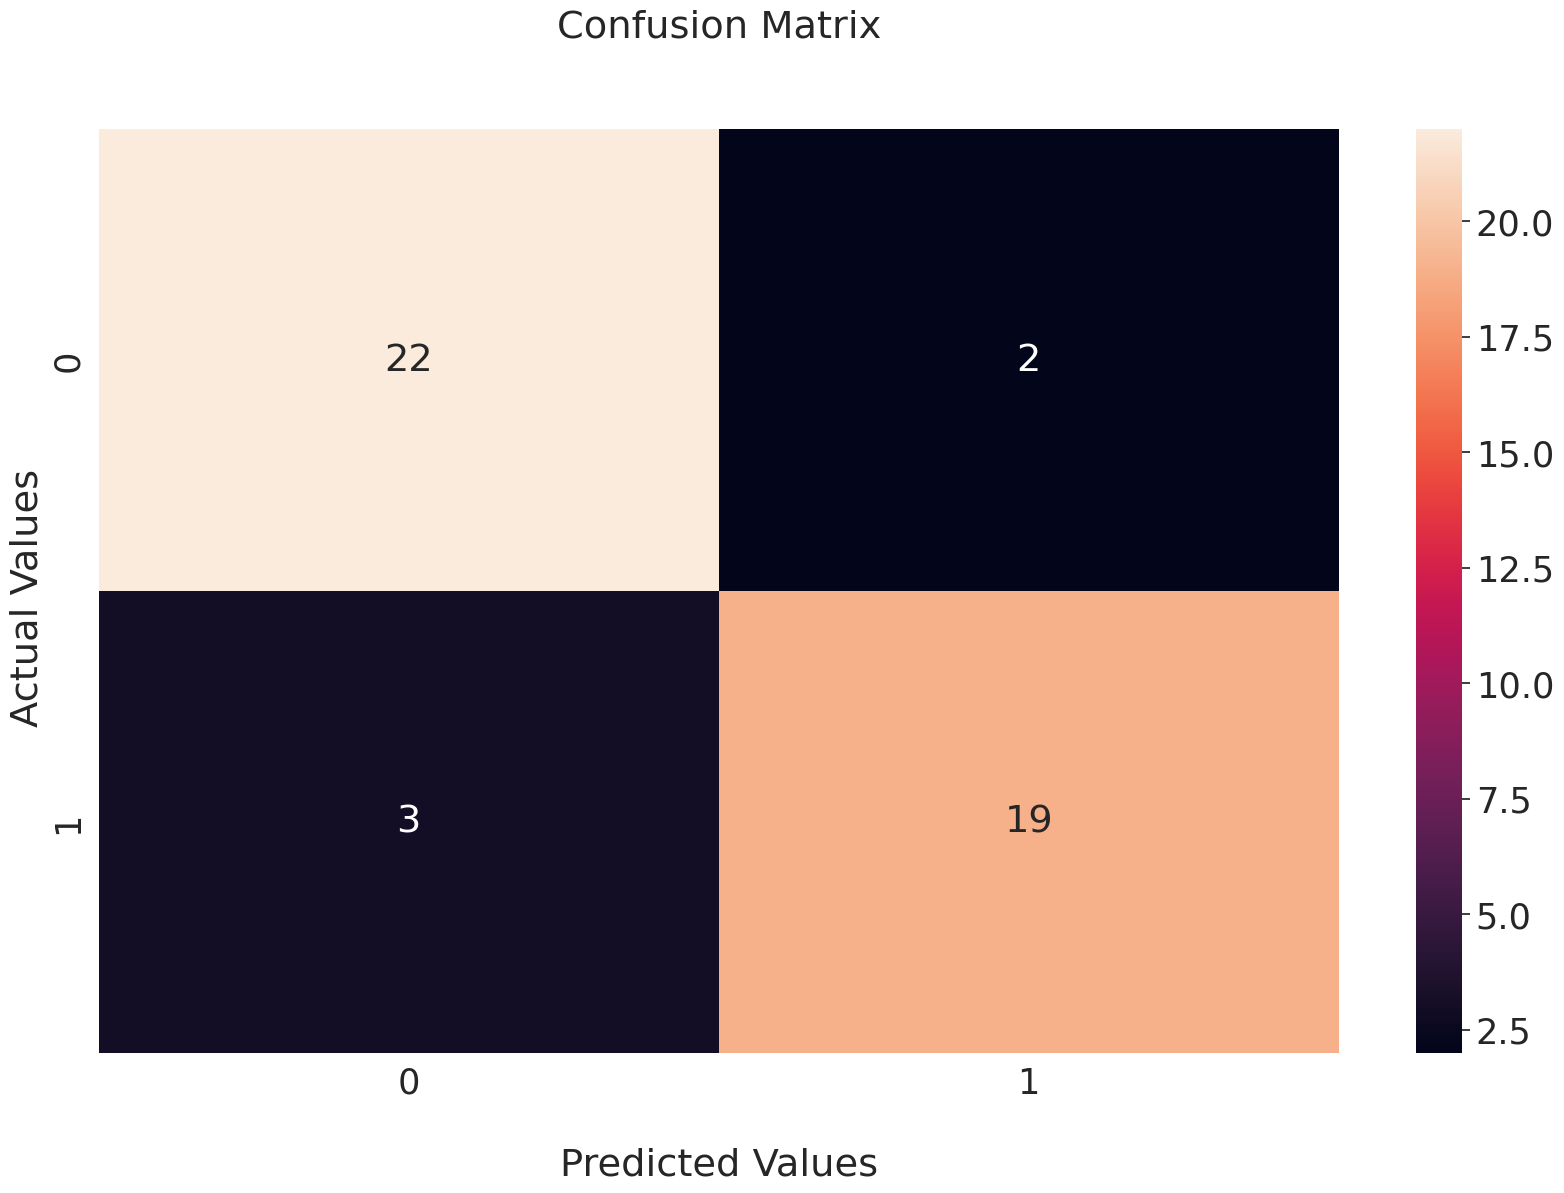

In [31]:
lr = LogisticRegression()


fit_and_evaluate_the_model(lr, x_train, y_train, x_test, y_test)

## Tuned Logistic Regression using GridSearchCV

In [32]:
lr0 = LogisticRegression()

# Create a parameter grid
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01], ## Regularization --- high C => stronger regularization
              'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']
             }


best_params = find_best_parameters(lr0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


,C,penalty,solver,Recall
9,0.10,l2,newton-cg,0.900000
10,0.10,l2,lbfgs,0.900000
11,0.10,l2,liblinear,0.900000
6,1.00,l2,newton-cg,0.881818
7,1.00,l2,lbfgs,0.881818
8,1.00,l2,liblinear,0.881818
12,0.01,l2,newton-cg,0.872727
13,0.01,l2,lbfgs,0.872727
0,100.00,l2,newton-cg,0.872727
1,100.00,l2,lbfgs,0.872727


In [33]:
# Get first key-value pair
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].to_dict(orient='index').items())) )
first_pair[1]

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.85      0.77      0.81        22

    accuracy                           0.83        46
   macro avg       0.83      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46

Recall:  0.7727272727272727


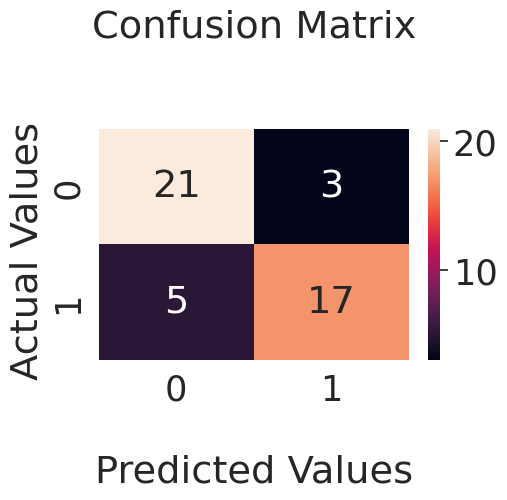

In [34]:
lr1 = LogisticRegression(**first_pair[1])


fit_and_evaluate_the_model(lr1, x_train, y_train, x_test, y_test)

## Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.90      0.86      0.88        22

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46

Recall:  0.8636363636363636


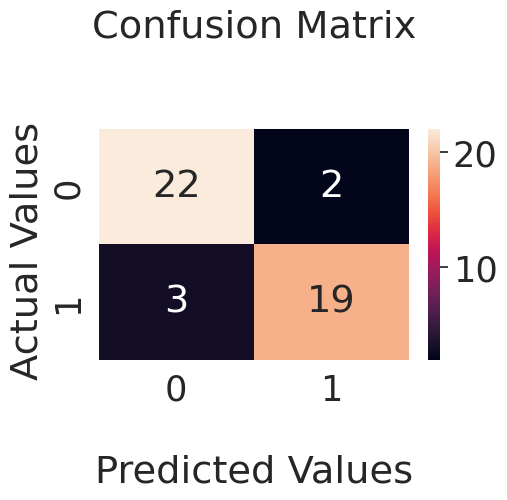

In [35]:
decision_tree = DecisionTreeClassifier()


fit_and_evaluate_the_model(decision_tree, x_train, y_train, x_test, y_test)

## Tuned Decision Tree using GridSearchCV

In [36]:
decision_tree0 = DecisionTreeClassifier()


# Create a parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


best_params = find_best_parameters(decision_tree0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


,criterion,max_depth,min_samples_leaf,min_samples_split,Recall
3,gini,NaN,2,2,0.827273
8,gini,NaN,4,10,0.827273
45,entropy,5.0,1,2,0.827273
35,gini,15.0,4,10,0.827273
12,gini,5.0,2,2,0.818182
...,...,...,...,...,...
5,gini,NaN,2,10,0.745455
65,entropy,15.0,1,10,0.745455
20,gini,10.0,1,10,0.745455
56,entropy,10.0,1,10,0.736364


In [37]:
# Exclude Recall column
# Replace nan value with None
# Convert dataframe to a dictionary


# Get first key-value pair
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].replace({np.nan: None}).to_dict(orient='index').items())) )
first_pair[1]

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.95      0.91      0.93        22

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46

Recall:  0.9090909090909091


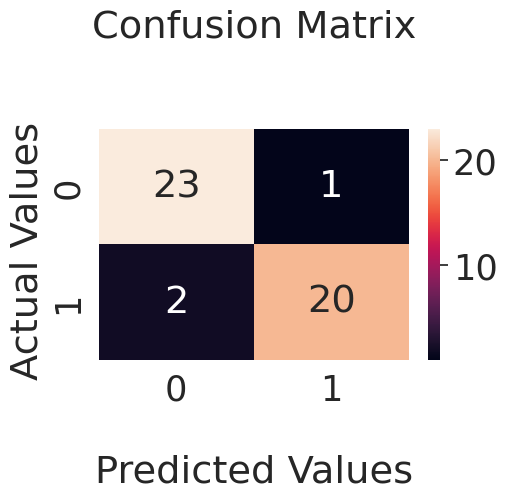

In [38]:
decision_tree1 = DecisionTreeClassifier(**first_pair[1])


fit_and_evaluate_the_model(decision_tree1, x_train, y_train, x_test, y_test)

## Random Forest

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.85      0.77      0.81        22

    accuracy                           0.83        46
   macro avg       0.83      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46

Recall:  0.7727272727272727


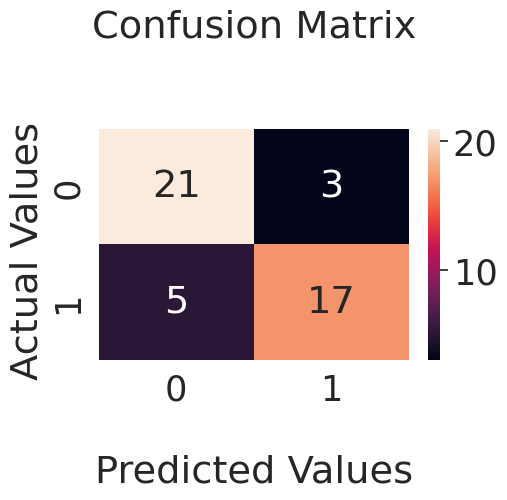

In [39]:
rfc = RandomForestClassifier()


fit_and_evaluate_the_model(rfc, x_train, y_train, x_test, y_test)

## Tuned Random Forest using GridSearchCV

In [40]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}


rfc0 = RandomForestClassifier()


best_params = find_best_parameters(rfc0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}


,criterion,max_depth,max_features,n_estimators,Recall
22,entropy,4,log2,200,0.909091
3,gini,4,log2,500,0.900000
14,gini,7,log2,200,0.890909
4,gini,5,sqrt,200,0.890909
29,entropy,6,sqrt,500,0.890909
23,entropy,4,log2,500,0.890909
1,gini,4,sqrt,500,0.890909
20,entropy,4,sqrt,200,0.881818
38,entropy,8,log2,200,0.881818
36,entropy,8,sqrt,200,0.881818


In [41]:
# Exclude the Recall column
# Convert the dataframe to a dictionary


# Get first key-value pair
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].to_dict(orient='index').items())) )
first_pair[1]

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.86      0.82      0.84        22

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46

Recall:  0.8181818181818182


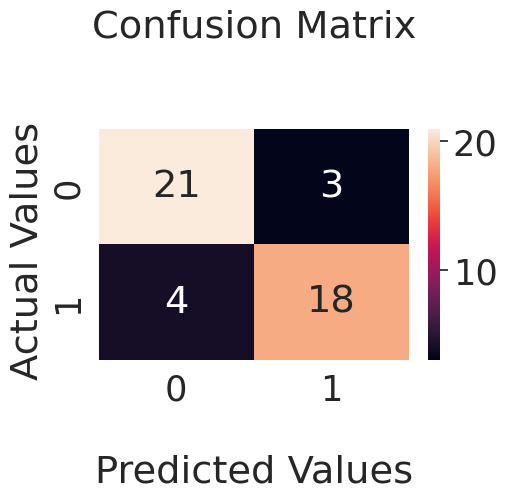

In [42]:
rfc1 = RandomForestClassifier(**first_pair[1])


fit_and_evaluate_the_model(rfc1, x_train, y_train, x_test, y_test)

## XGBoost

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.86      0.82      0.84        22

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46

Recall:  0.8181818181818182


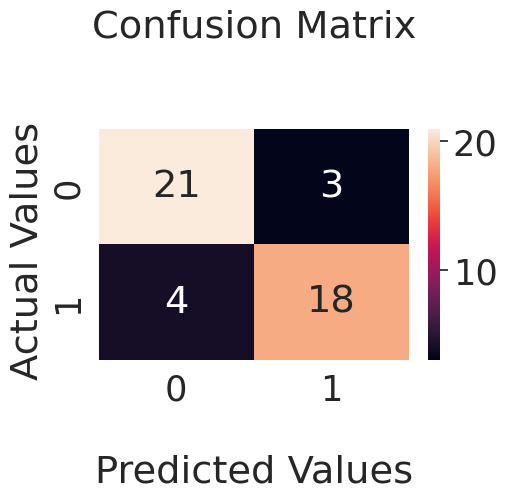

In [43]:
xgb = XGBClassifier()


fit_and_evaluate_the_model(xgb, x_train, y_train, x_test, y_test)

## Tuned XGBoost using GridSearchCV

In [44]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    'gamma': [0, 1, 2]
}


xgb0 = XGBClassifier()


best_params = find_best_parameters(xgb0, param_grid, x_train, y_train, x_test, y_test)
best_params

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,subsample,Recall
364,0.9,1,0.2,4,200,0.9,0.890909
9,0.8,0,0.1,4,100,0.8,0.890909
220,0.8,2,0.3,3,200,0.9,0.890909
232,0.8,2,0.3,4,300,0.9,0.890909
241,0.8,2,0.3,5,300,0.9,0.890909
...,...,...,...,...,...,...,...
543,1.0,0,0.3,3,200,0.8,0.818182
697,1.0,2,0.2,5,200,0.9,0.818182
700,1.0,2,0.2,5,300,0.9,0.818182
694,1.0,2,0.2,5,100,0.9,0.809091


In [45]:
# Exclude the Recall column
# Convert the dataframe to a dictionary


# Get first key-value pair
first_pair = next(iter((best_params.loc[:, ~best_params.columns.isin(['Recall'])].to_dict(orient='index').items())) )
first_pair[1]

{'colsample_bytree': 0.9,
 'gamma': 1,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.9}

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

Recall:  0.8636363636363636


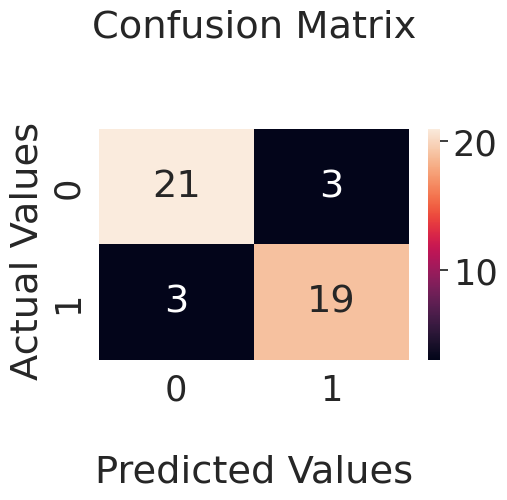

In [46]:
xgb1 = XGBClassifier(**first_pair[1])


fit_and_evaluate_the_model(xgb1, x_train, y_train, x_test, y_test)

## Cross Validation to check model stability

In [47]:
def cross_validation(model, x_train, y_train):
    scores = cross_val_score(model, x_train, y_train, cv=5)
    
    print("Cross Validation Scores:\n")

    print("Mean score: ", scores.mean()) # Print mean score
    print("Standard deviation: ", scores.std()) # Print Standard Deviation
    
    
    return scores

In [48]:
# cross validate logistic regression
lr_scores = cross_validation(decision_tree1, x_train, y_train)

Cross Validation Scores:

Mean score:  0.757957957957958
Standard deviation:  0.06703762818852331


In [49]:
# cross validate decision tree model
dtree_scores = cross_validation(decision_tree0, x_train, y_train)

Cross Validation Scores:

Mean score:  0.768918918918919
Standard deviation:  0.03455868068255248


In [50]:
# cross validate random forest model
rf_scores = cross_validation(rfc1, x_train, y_train)

Cross Validation Scores:

Mean score:  0.8024024024024025
Standard deviation:  0.042560085884077004


In [51]:
# cross validate xgboost model
xgboost_scores = cross_validation(xgb, x_train, y_train)

Cross Validation Scores:

Mean score:  0.7908408408408409
Standard deviation:  0.046097807873842093


## Plot Cross-Validation Scores using Box Plot

AttributeError: Text.set() got an unexpected keyword argument 'Fontsize'

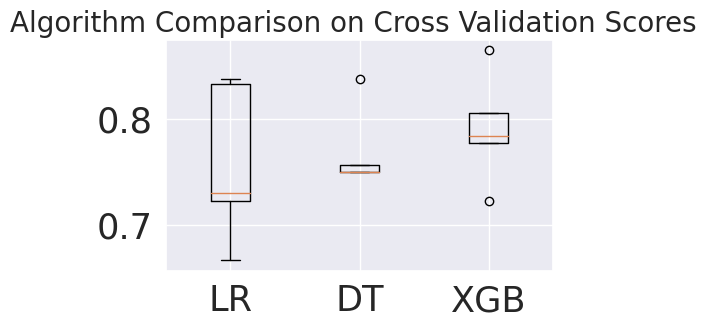

In [53]:
results = []

results.append(lr_scores)
results.append(dtree_scores)
results.append(xgboost_scores)


fig = plt.figure()
fig.suptitle('Algorithm Comparison on Cross Validation Scores', size=20)
plt.boxplot(results)
plt.xticks([1, 2, 3], ['LR','DT', 'XGB'], Fontsize=4)

## Export the best performing model

In [56]:
with open('best_model', 'wb') as file:
  pickle.dump(xgb, file)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['README.md', 'Software.ipynb', 'best_model', 'ht.ipynb', 'Heart_disease_prediction.ipynb', 'heart.csv']


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    Y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
Y_pred_rf = rf.predict(x_test)

In [66]:
Y_pred_rf.shape

(46,)

In [67]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.96 %
